In [1]:
import io
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [3]:
#Link to dataset: https://www.kaggle.com/datasets/ahmadrazakashif/housing-detail

#from google.colab import files
#uploaded = files.upload()

# Dataset Background and Description

*   A privately collected dataset from Kaggle with no furhter open publication or sourcing
*   Appears to be a teaching dataset primarily used for linear regression practice
*   Includes 545 rows of residential assets with 13 variables

# Purpose

* The main idea behind this dataset is to understand how different property characteristics influence the sale price of a home.
* Since it contains a mix of numerical variables and categorical features, it gives a good foundation for exploring.
*  Overall, the dataset allows us to ask and answer questions such as:

    Which house features increase or decrease the sale price?

    How strong is the relationship between size and price?

#Context
* House prices depend on both structural features (size, number of bedrooms, bathrooms) and amenity-related features (furnishing, parking, main road access, AC, etc.).
* This dataset contains 545 individual houses, each with 13 property-related variables, making it suitable for the type of statistical exploration.


In [5]:
#df = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))
df = pd.read_csv('Housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
print("Shape of data:", df.shape)
print("----------------------------------")
print("\nData types and non-null counts:")
print(df.info())
print("----------------------------------")
print("\nFirst few rows:")
print(df.head())

Shape of data: (545, 13)
----------------------------------

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
----------------------------------

First few rows:
    

In [9]:
print("\nNumeric summary:")
print(df.describe().round(4))


Numeric summary:
              price        area  bedrooms  bathrooms   stories   parking
count  5.450000e+02    545.0000  545.0000   545.0000  545.0000  545.0000
mean   4.766729e+06   5150.5413    2.9651     1.2862    1.8055    0.6936
std    1.870440e+06   2170.1410    0.7381     0.5025    0.8675    0.8616
min    1.750000e+06   1650.0000    1.0000     1.0000    1.0000    0.0000
25%    3.430000e+06   3600.0000    2.0000     1.0000    1.0000    0.0000
50%    4.340000e+06   4600.0000    3.0000     1.0000    2.0000    0.0000
75%    5.740000e+06   6360.0000    3.0000     2.0000    2.0000    1.0000
max    1.330000e+07  16200.0000    6.0000     4.0000    4.0000    3.0000


In [11]:
print("Missing values for column:")
df.isna().sum()
df.isna().mean().sort_values()

Missing values for column:


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

# Variable Exploration Through Visualization



*   sns.histplot used for numerical variables containing large ranges
*   sns.countplot used for variables with whole integars and categorical qualities
*   plt.pie used to display relative share of categorical variables



In [20]:
#Numerical
data = df['price'].dropna()
skew = data.skew()
print(f"Variable: {'price'}")
print(f"Skewness: {skew:.4f}")
if abs(skew) > 0.5:
    print("Distribution is skewed: Five Number Summary")
    desc = data.describe(percentiles=[0.25, 0.5, 0.75])
    print(desc[["min", "25%", "50%", "75%", "max"]])
else:
    print("Distribution is symmetric: Mean and Standard Deviation")
    print(f"Mean: {data.mean():.3f}")
    print(f"Std Dev: {data.std():.3f}")

#Create 5 equal frequency bins (quintiles)
df['price_bin'] = pd.qcut(df['price'], q=5, duplicates='drop')

#Count and percentage for each bin
counts = df['price_bin'].value_counts(sort=False, dropna=False)
percent = df['price_bin'].value_counts(normalize=True, sort=False, dropna=False) * 100

summary = pd.DataFrame({
    "Range": counts.index.astype(str),
    "Count": counts.values,
    "Percentage (%)": percent.round(2).values
})
print(summary)

Variable: price
Skewness: 1.2122
Distribution is skewed: Five Number Summary
min     1750000.0
25%     3430000.0
50%     4340000.0
75%     5740000.0
max    13300000.0
Name: price, dtype: float64
                      Range  Count  Percentage (%)
0  (1749999.999, 3290000.0]    115           21.10
1    (3290000.0, 3990000.0]    104           19.08
2    (3990000.0, 4830000.0]    111           20.37
3    (4830000.0, 6093500.0]    106           19.45
4   (6093500.0, 13300000.0]    109           20.00


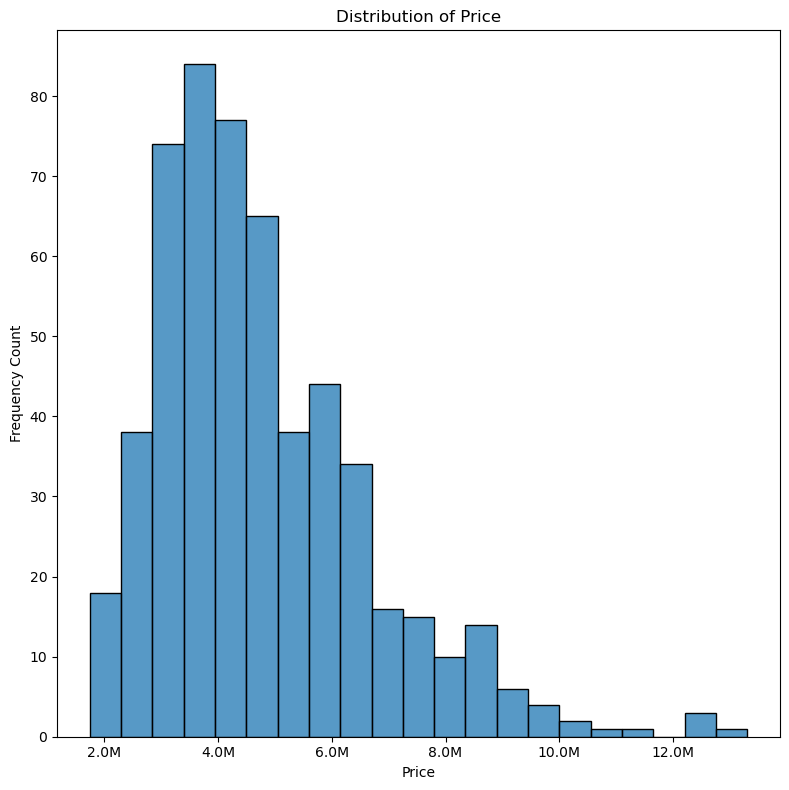

Variable: price
Skewness: 1.2122
Distribution is skewed: Five Number Summary
min     1750000.0
25%     3430000.0
50%     4340000.0
75%     5740000.0
max    13300000.0
Name: price, dtype: float64
                    Range  Count  Percentage (%)
0           0 - 3,000,000     71           13.03
1   3,000,001 - 5,000,000    279           51.19
2   5,000,001 - 7,000,000    131           24.04
3   7,000,001 - 9,000,000     47            8.62
4  9,000,001 - 20,000,000     17            3.12


In [22]:
#Price (numerical)
def money_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return f'{int(x)}'

plt.figure(figsize=(8, 8))
sns.histplot(data=df, x='price')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency Count')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(money_formatter))
plt.tight_layout()
plt.show()

data = df['price'].dropna()
skew = data.skew()
print(f"Variable: {'price'}")
print(f"Skewness: {skew:.4f}")
print("Distribution is skewed: Five Number Summary")
desc = data.describe(percentiles=[0.25, 0.5, 0.75])
print(desc[["min", "25%", "50%", "75%", "max"]])

#Custom price bins
bins = [0, 3_000_000, 5_000_000, 7_000_000, 9_000_000, 20_000_000]
labels = [
    "0 - 3,000,000",
    "3,000,001 - 5,000,000",
    "5,000,001 - 7,000,000",
    "7,000,001 - 9,000,000",
    "9,000,001 - 20,000,000"
]

#Cutting the price variable into your ranges
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Count and percentage for each bin
counts = df['price_bin'].value_counts(sort=False, dropna=False)
percent = df['price_bin'].value_counts(normalize=True, sort=False, dropna=False) * 100

summary = pd.DataFrame({
    "Range": counts.index.astype(str),
    "Count": counts.values,
    "Percentage (%)": percent.round(2).values
})
print(summary)

### Price
* The distribution of price is clearly right-skewed. Most houses fall in the lower and middle price ranges, while a small number of properties are extremely expensive. This long right tail shows the presence of high-value outliers, which explains the skewed distribution.

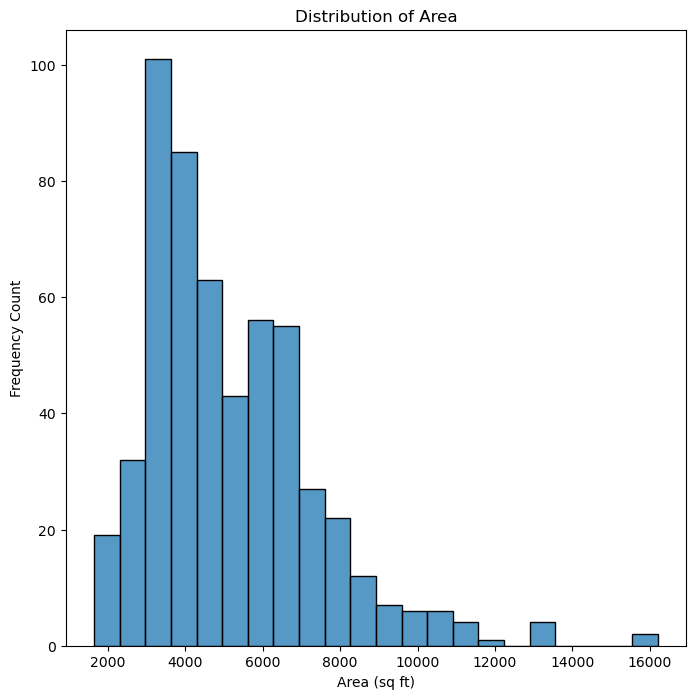

Variable: area
Skewness: 1.3212
Distribution is skewed: Five Number Summary
min     1650.0
25%     3600.0
50%     4600.0
75%     6360.0
max    16200.0
Name: area, dtype: float64


In [24]:
#Area (numerical)
plt.figure(figsize=(8,8))
sns.histplot(x='area', data=df)
plt.title('Distribution of Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Frequency Count')
plt.show()

data = df['area'].dropna()
skew = data.skew()
print(f"Variable: {'area'}")
print(f"Skewness: {skew:.4f}")
print("Distribution is skewed: Five Number Summary")
desc = data.describe(percentiles=[0.25, 0.5, 0.75])
print(desc[["min", "25%", "50%", "75%", "max"]])

### Area
* Area is also right-skewed. The majority of homes have moderate built-up areas, with a few very large houses pushing the maximum value upward. This suggests that extremely spacious properties are rare in the dataset.

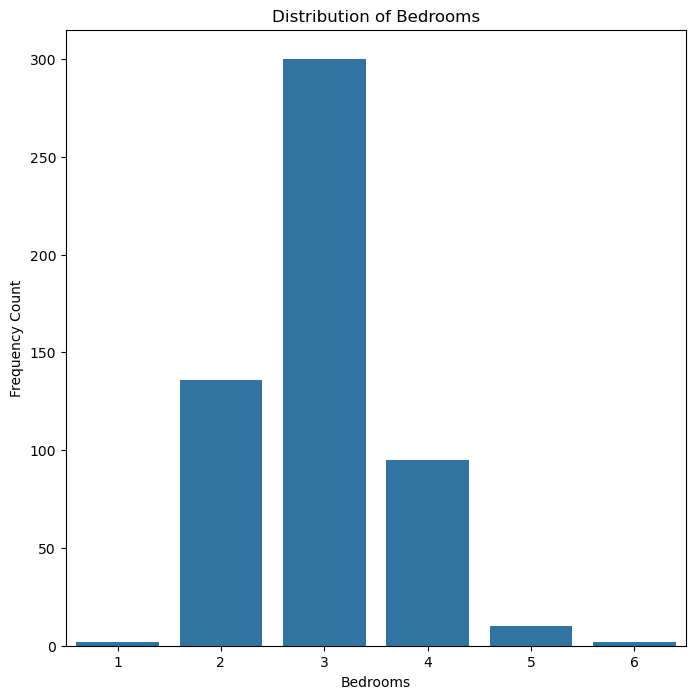

Variable: bedrooms
Skewness: 0.4957
Distribution is symmetric: Mean and Standard Deviation
Mean: 2.965
Std Dev: 0.738
bedrooms
1      2
2    136
3    300
4     95
5     10
6      2
Name: count, dtype: int64


In [26]:
#Bedrooms (numerical)
plt.figure(figsize=(8,8))
sns.countplot(x='bedrooms', data=df)
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency Count')
plt.show()

data = df['bedrooms'].dropna()
skew = data.skew()
print(f"Variable: {'bedrooms'}")
print(f"Skewness: {skew:.4f}")
print("Distribution is symmetric: Mean and Standard Deviation")
print(f"Mean: {data.mean():.3f}")
print(f"Std Dev: {data.std():.3f}")

bedroom_counts = df['bedrooms'].value_counts().sort_index()
print(bedroom_counts)

### Bedrooms
* Bedrooms show a more symmetric distribution. Most houses have between 2 and 4 bedrooms, which is expected for typical residential homes. There are no extreme outliers or unusual values in this variable.

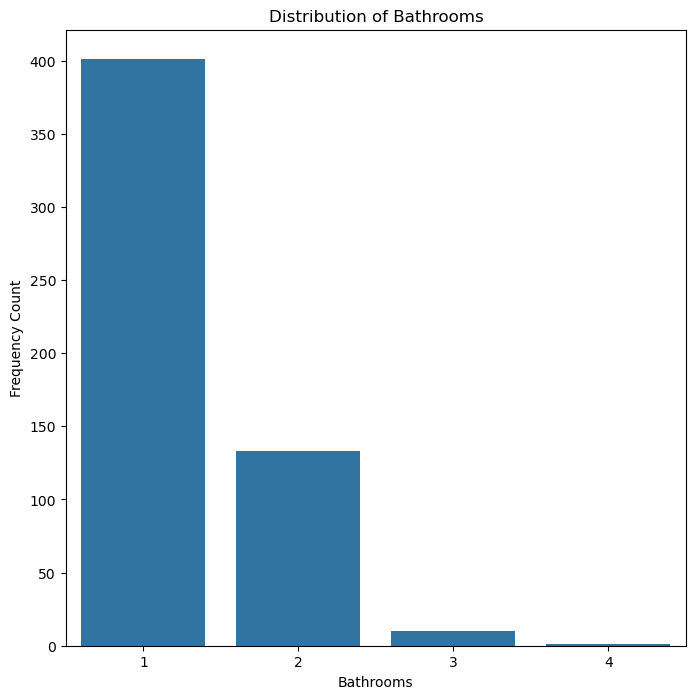

Variable: bathrooms
Skewness: 1.5893
Distribution is skewed: Five Number Summary
min    1.0
25%    1.0
50%    1.0
75%    2.0
max    4.0
Name: bathrooms, dtype: float64
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


In [28]:
#Bathrooms (numerical)
plt.figure(figsize=(8,8))
sns.countplot(x='bathrooms', data=df)
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency Count')
plt.show()

data = df['bathrooms'].dropna()
skew = data.skew()
print(f"Variable: {'bathrooms'}")
print(f"Skewness: {skew:.4f}")
print("Distribution is skewed: Five Number Summary")
desc = data.describe(percentiles=[0.25, 0.5, 0.75])
print(desc[["min", "25%", "50%", "75%", "max"]])

bathroom_counts = df['bathrooms'].value_counts().sort_index()
print(bathroom_counts)

### Bathrooms
* The distribution of bathrooms is slightly skewed. Most properties have between 1 and 2 bathrooms, with fewer homes having 3 or more. The skew reflects that larger, multi-bathroom homes are less common.

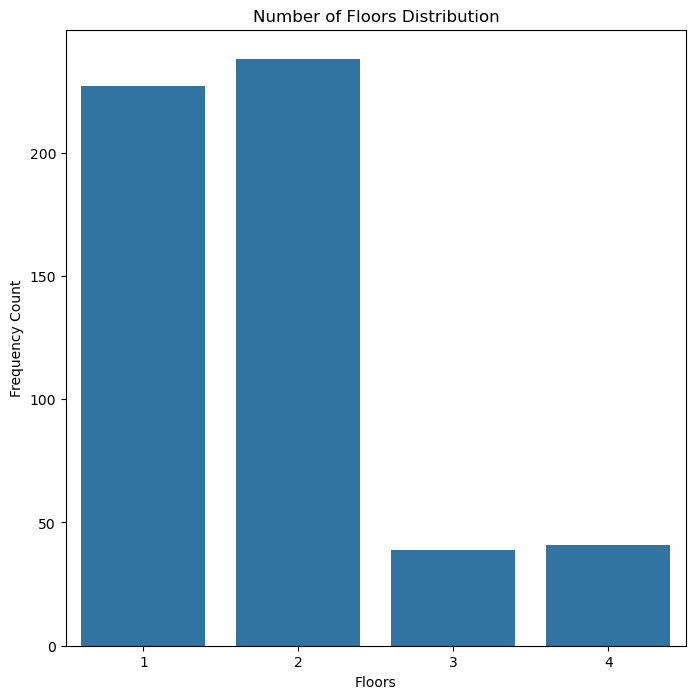

Variable: stories
Skewness: 1.0821
Distribution is skewed: Five Number Summary
min    1.0
25%    1.0
50%    2.0
75%    2.0
max    4.0
Name: stories, dtype: float64
stories
1    227
2    238
3     39
4     41
Name: count, dtype: int64


In [30]:
#Stories (numerical)
plt.figure(figsize=(8,8))
sns.countplot(x='stories', data=df)
plt.title('Number of Floors Distribution')
plt.xlabel('Floors')
plt.ylabel('Frequency Count')
plt.show()

data = df['stories'].dropna()
skew = data.skew()
print(f"Variable: {'stories'}")
print(f"Skewness: {skew:.4f}")
print("Distribution is skewed: Five Number Summary")
desc = data.describe(percentiles=[0.25, 0.5, 0.75])
print(desc[["min", "25%", "50%", "75%", "max"]])

stories_counts = df['stories'].value_counts().sort_index()
print(stories_counts)

### Stories
* The number of stories shows a mild right skew. Most houses have 1 or 2 floors, while taller buildings with 3 or 4 floors are present but much less frequent. This distribution makes sense for residential neighborhoods.

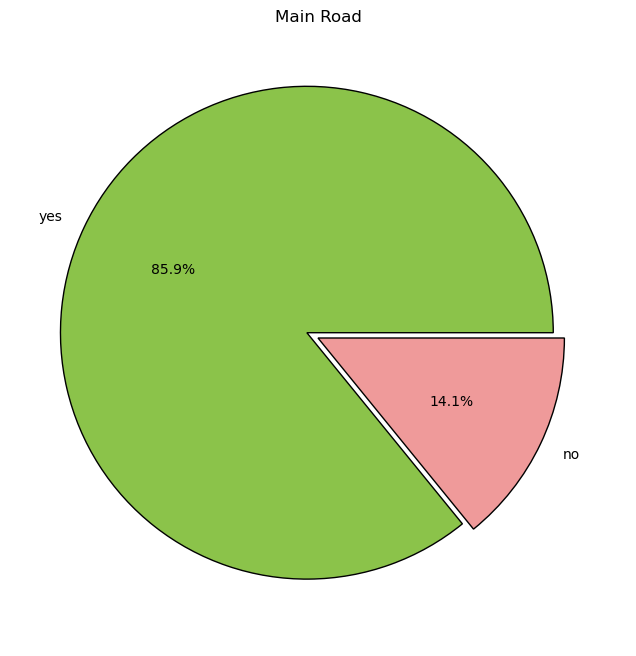

Frequency Table for mainroad
          Count  Percentage (%)
mainroad                       
yes         468           85.87
no           77           14.13


In [32]:
#Main Road (categorical)
main = df['mainroad'].value_counts()

Labels = ['yes', 'no']
Colors = ['#8BC34A', '#EF9A9A']

plt.figure(figsize=(8,8))
plt.pie(main,autopct='%1.1f%%', explode=[0.05,0],labels=Labels, colors=Colors, wedgeprops={'edgecolor':"black"})
plt.title('Main Road')
plt.show()

counts = df['mainroad'].value_counts(dropna=False)
percent = df['mainroad'].value_counts(normalize=True, dropna=False) * 100
summary = pd.DataFrame({
    "Count": counts,
    "Percentage (%)": percent.round(2)})
print(f"Frequency Table for {'mainroad'}")
print(summary)

### Mainroad
* A large number of homes have access to the main road. This suggests that accessibility may be an important factor in housing location within the dataset.


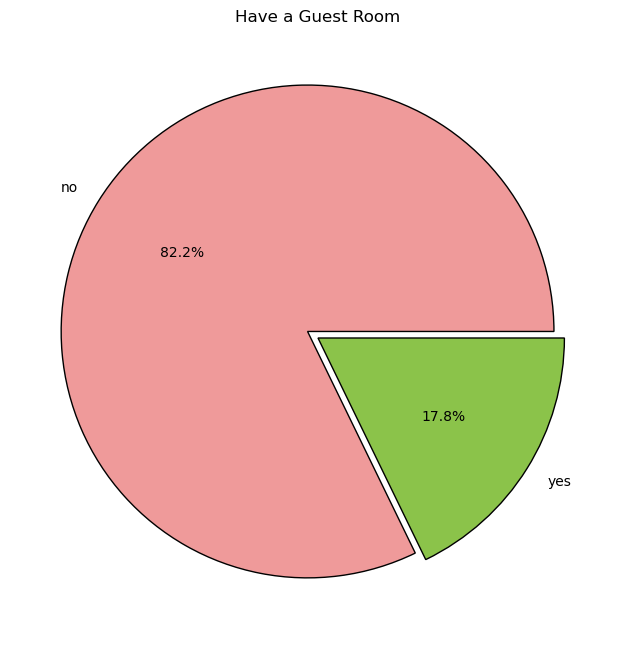

Frequency Table for guestroom
           Count  Percentage (%)
guestroom                       
no           448            82.2
yes           97            17.8


In [34]:
#Guest Room (categorical)
guest = df['guestroom'].value_counts()
Labels = guest.index.tolist()

soft_green = '#8BC34A'
soft_red   = '#EF9A9A'
Colors = [soft_green if label == 'yes' else soft_red for label in Labels]
explode_vals = [0.05 if label == 'no' else 0 for label in Labels]

plt.figure(figsize=(8,8))
plt.pie(
    guest,                  
    labels=Labels,            
    colors=Colors,            
    autopct='%1.1f%%',        
    explode=explode_vals,     
    wedgeprops={'edgecolor': "black"} 
)
plt.title('Have a Guest Room')
plt.show()

# Frequency Table
counts = df['guestroom'].value_counts(dropna=False)
percent = df['guestroom'].value_counts(normalize=True, dropna=False) * 100

summary = pd.DataFrame({
    "Count": counts,
    "Percentage (%)": percent.round(2)
})

print("Frequency Table for guestroom")
print(summary)

### Guestroom
* Most homes do not have a guest room. Guest rooms appear to be a premium feature that only a smaller portion of properties include.

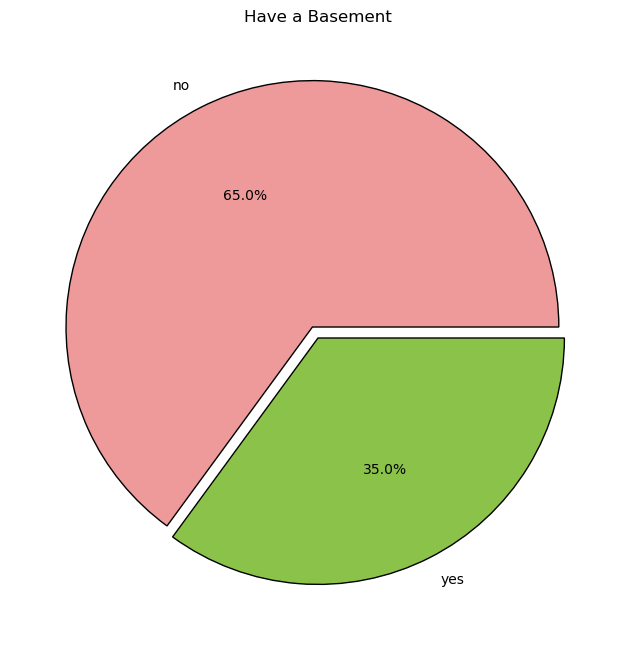

Frequency Table for basement
          Count  Percentage (%)
basement                       
no          354           64.95
yes         191           35.05


In [36]:
#Basement (categorical)
basement = df['basement'].value_counts()
Labels = basement.index.tolist()

soft_green = '#8BC34A'
soft_red   = '#EF9A9A'
Colors = [soft_green if label == 'yes' else soft_red for label in Labels]
explode_vals = [0.05 if label == 'no' else 0 for label in Labels]

plt.figure(figsize=(8,8))
plt.pie(
    basement,                
    labels=Labels,            
    colors=Colors, 
    autopct='%1.1f%%',       
    explode=explode_vals,     
    wedgeprops={'edgecolor': "black"}  
)
plt.title('Have a Basement')
plt.show()

# Frequency Table
counts = df['basement'].value_counts(dropna=False)
percent = df['basement'].value_counts(normalize=True, dropna=False) * 100

summary = pd.DataFrame({
    "Count": counts,
    "Percentage (%)": percent.round(2)
})

print("Frequency Table for basement")
print(summary)

### Basement
* Basements are not common in the dataset. The majority of properties have no basement, which might reflect regional building styles or space limitations.

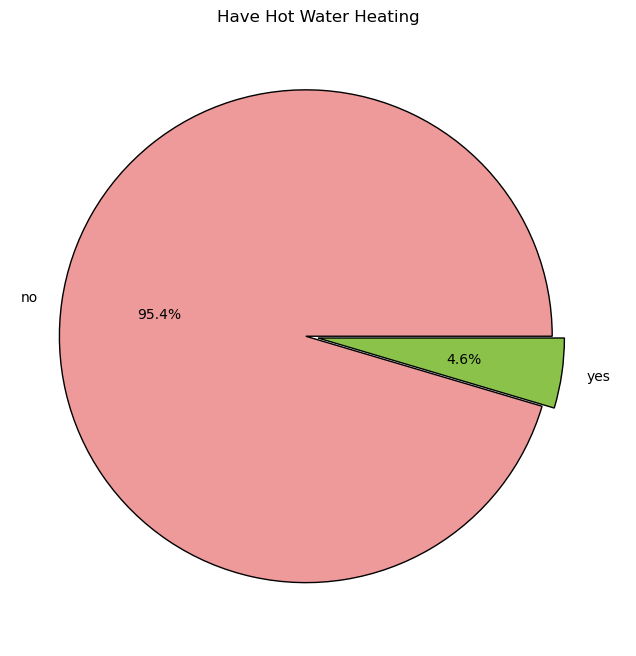

Frequency Table for hotwaterheating
                 Count  Percentage (%)
hotwaterheating                       
no                 520           95.41
yes                 25            4.59


In [38]:
#Hot Water (categorical)
hot = df['hotwaterheating'].value_counts()
Labels = hot.index.tolist()

soft_green = '#8BC34A'
soft_red   = '#EF9A9A'
Colors = [soft_green if label == 'yes' else soft_red for label in Labels]
explode_vals = [0.05 if label == 'no' else 0 for label in Labels]

plt.figure(figsize=(8,8))
plt.pie(
    hot,                      
    labels=Labels,            
    colors=Colors,            
    autopct='%1.1f%%',        
    explode=explode_vals,     
    wedgeprops={'edgecolor': "black"} 
)
plt.title('Have Hot Water Heating')
plt.show()

# Frequency Table
counts = df['hotwaterheating'].value_counts(dropna=False)
percent = df['hotwaterheating'].value_counts(normalize=True, dropna=False) * 100

summary = pd.DataFrame({
    "Count": counts,
    "Percentage (%)": percent.round(2)
})

print("Frequency Table for hotwaterheating")
print(summary)

### Hot Water
* Hot water heating is extremely uncommon in this dataset. Only about 4–5% of homes include it, while more than 95% do not. This indicates that hot water heating is not a standard feature in these properties.

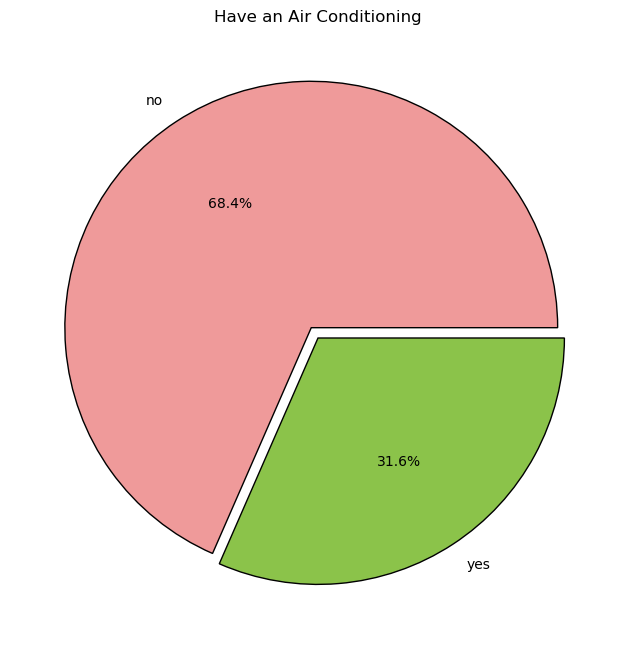

Frequency Table for airconditioning
                 Count  Percentage (%)
airconditioning                       
no                 373           68.44
yes                172           31.56


In [40]:
#Air Conditioning (categorical)
air = df['airconditioning'].value_counts()
Labels = air.index.tolist()  # ensures we match actual labels in the data

soft_green = '#8BC34A'
soft_red   = '#EF9A9A'
Colors = [soft_green if label == 'yes' else soft_red for label in Labels]
explode_vals = [0.05 if label == 'no' else 0 for label in Labels]

plt.figure(figsize=(8,8))
plt.pie(
    air,                     
    labels=Labels,      
    colors=Colors,         
    autopct='%1.1f%%',     
    explode=explode_vals,   
    wedgeprops={'edgecolor': "black"}
)
plt.title('Have an Air Conditioning')
plt.show()

counts = df['airconditioning'].value_counts(dropna=False)
percent = df['airconditioning'].value_counts(normalize=True, dropna=False) * 100

summary = pd.DataFrame({
    "Count": counts,
    "Percentage (%)": percent.round(2)
})

print(f"Frequency Table for {'airconditioning'}")
print(summary)

### Airconditioning
* Only about 32% of the properties include AC, while 68% lack it.
This suggests that air conditioning is not a standard or universally available amenity in this housing market.

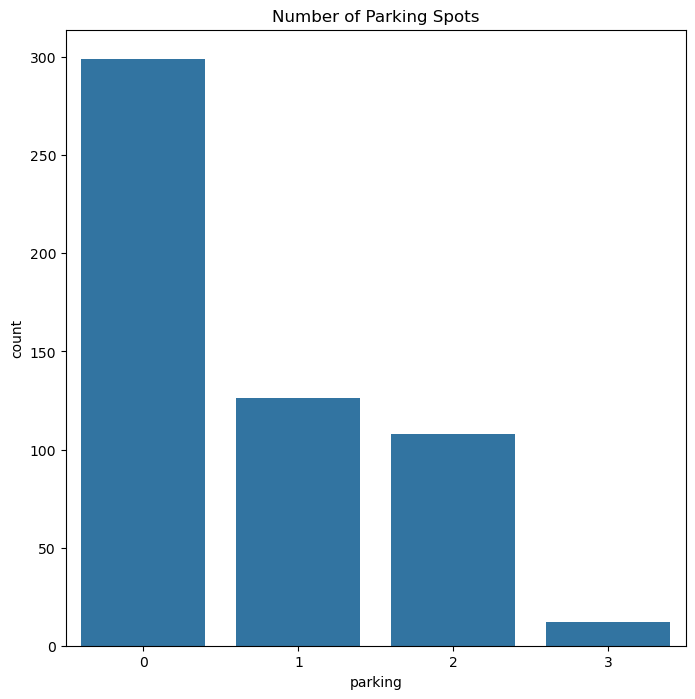

Variable: parking
Skewness: 0.8421
Distribution is skewed: Five Number Summary
min    0.0
25%    0.0
50%    0.0
75%    1.0
max    3.0
Name: parking, dtype: float64
parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64


In [42]:
#Parking Spots (numerical)
plt.figure(figsize=(8,8))
sns.countplot(x='parking',data=df)
plt.title("Number of Parking Spots")
plt.show()

data = df['parking'].dropna()
skew = data.skew()
print(f"Variable: {'parking'}")
print(f"Skewness: {skew:.4f}")
print("Distribution is skewed: Five Number Summary")
desc = data.describe(percentiles=[0.25, 0.5, 0.75])
print(desc[["min", "25%", "50%", "75%", "max"]])

parking_counts = df['parking'].value_counts().sort_index()
print(parking_counts)

### Parking
* The number of parking spaces ranges from 0 to 3, but the majority of homes have zero parking spaces, followed by a smaller number with 1 space. Very few have 2 or 3 spaces. The distribution is right-skewed, indicating that higher parking counts are much less common.

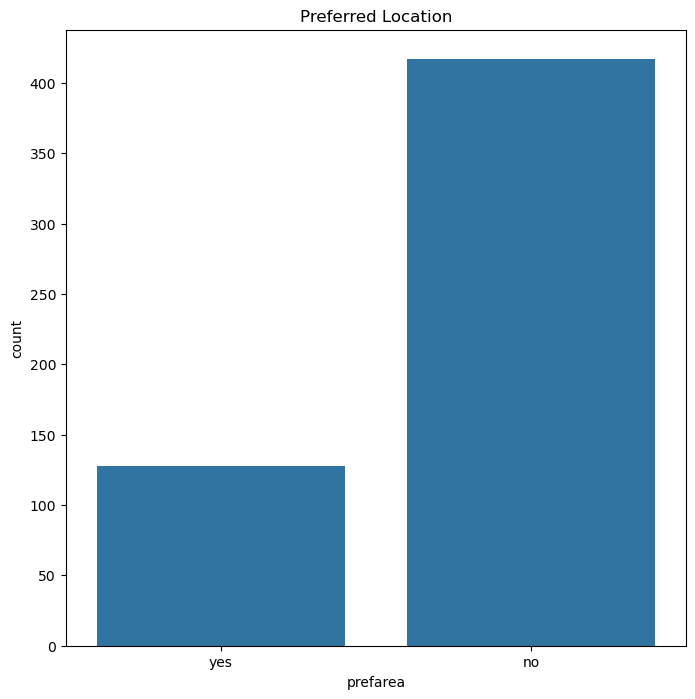

Frequency Table for prefarea
          Count  Percentage (%)
prefarea                       
no          417           76.51
yes         128           23.49


In [46]:
#Preferred Location (categorical)
plt.figure(figsize=(8,8))
sns.countplot(x='prefarea',data=df)
plt.title("Preferred Location")
plt.show()

counts = df['prefarea'].value_counts(dropna=False)
percent = df['prefarea'].value_counts(normalize=True, dropna=False) * 100
summary = pd.DataFrame({
    "Count": counts,
    "Percentage (%)": percent.round(2)})

print(f"Frequency Table for {'prefarea'}")
print(summary)

### Preferred Location
* Only a small portion of the dataset falls under “preferred areas” (about 24%). Since preferred locations often command higher prices, this variable could have an important influence on property value and should be examined further in the analysis.

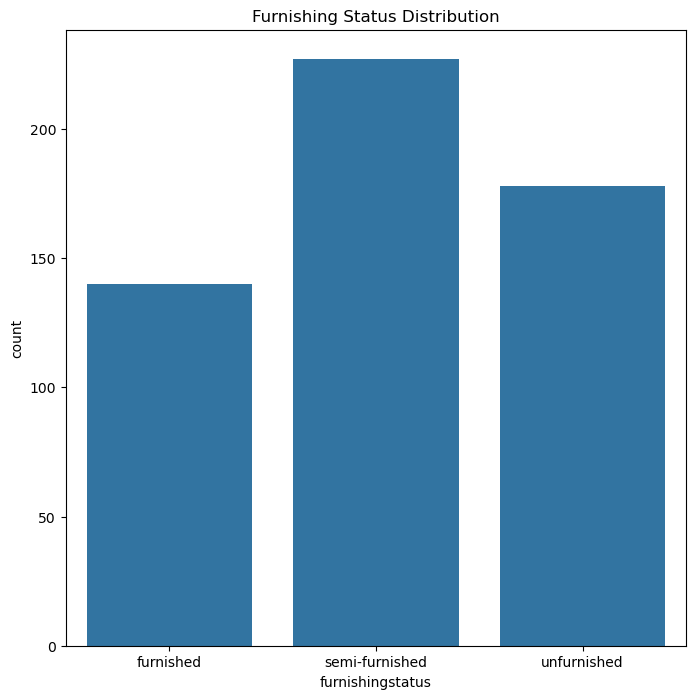

Frequency Table for furnishingstatus
                  Count  Percentage (%)
furnishingstatus                       
semi-furnished      227           41.65
unfurnished         178           32.66
furnished           140           25.69


In [48]:
#Furnished (categorical)
plt.figure(figsize=(8,8))
sns.countplot(x='furnishingstatus',data=df)
plt.title('Furnishing Status Distribution')
plt.show()

counts = df['furnishingstatus'].value_counts(dropna=False)
percent = df['furnishingstatus'].value_counts(normalize=True, dropna=False) * 100
summary = pd.DataFrame({
    "Count": counts,
    "Percentage (%)": percent.round(2)})

print(f"Frequency Table for {'furnishingstatus'}")
print(summary)

### Furnished
* The dataset contains a mix of unfurnished, semi-furnished, and fully furnished homes. Furnished and semi-furnished homes seem more common, showing that many properties include some level of interior furnishing.

# Summary Statistics

### Numerical Variables – Interpretations

- **Price:** The distribution of price is heavily right-skewed, meaning most homes fall in the lower price range while a few expensive properties raise the maximum value. Because of this skewness, the five-number summary better represents the data than the mean.

- **Area:** Area is also right-skewed. Most homes have moderate built-up areas, with a few extremely large properties increasing the maximum. A five-number summary is more appropriate.

- **Bedrooms:** The bedroom count is almost symmetric. Most houses have between 2 and 4 bedrooms, with no unusual outliers. The mean and standard deviation describe this variable well.

- **Bathrooms:** Bathrooms show noticeable skewness. Most homes have 1 or 2 bathrooms, while some have 3 or more, creating a long upper tail. A five-number summary fits better.

- **Stories:** The number of stories is slightly skewed, with most homes having 1 or 2 floors. Taller houses with more floors are less frequent, so a five-number summary is more appropriate.

### Categorical Variables – Interpretations

- **mainroad:** Most houses have access to the main road, suggesting that accessibility is common and may affect home values.

- **guestroom:** Guest rooms are relatively uncommon, indicating that this is likely a premium feature.

- **basement:** Basements appear rarely in the dataset, possibly due to regional construction styles.

- **hotwaterheating:** Few homes include hot water heating. This is not a standard feature for most properties.

- **airconditioning:** Air conditioning is present in the majority of homes. It appears to be a widely expected amenity.

- **parking:** Most homes offer 1–2 parking spaces, with some reaching up to 3. Parking availability is fairly standard across the dataset.

- **prefarea:** Only some homes are located in preferred areas. This may contribute to price differences across neighborhoods.

- **furnishingstatus:** Furnished and semi-furnished homes are more common than unfurnished ones, suggesting that many properties include some level of interior furnishing.

# Exploring Relationships Between Variables


*   Scatter Plot: price & area
*   Boxplot/Histogram: price & main road
*   Boxplot/Histogram: price & furnishing status
*   Boxplot/Histogram: area & parking
*   Two-Way Table: hot water & air conditoning



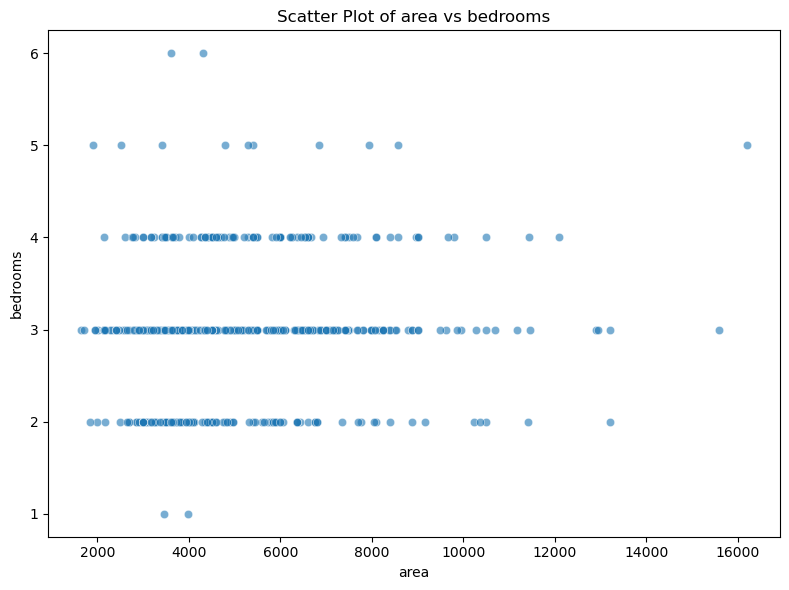

Pearson correlation between area and bedrooms: 0.152 (p = 3.741e-04)


In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='area', y='bedrooms', alpha=0.6)
plt.title(f"Scatter Plot of {'area'} vs {'bedrooms'}")
plt.xlabel('area')
plt.ylabel('bedrooms')
plt.tight_layout()
plt.show()

corr, pval = stats.pearsonr(df['bedrooms'].dropna(), df['area'].dropna())
print(f"Pearson correlation between {'area'} and {'bedrooms'}: {corr:.3f} (p = {pval:.3e})")

### Interpretation: Scatter Plot (area vs bedrooms)
There is a weak positive relationship between area and number of bedrooms. Homes with more bedrooms tend to have larger built-up areas, but the trend is not very strong, as indicated by the modest correlation value and scattered points on the plot.

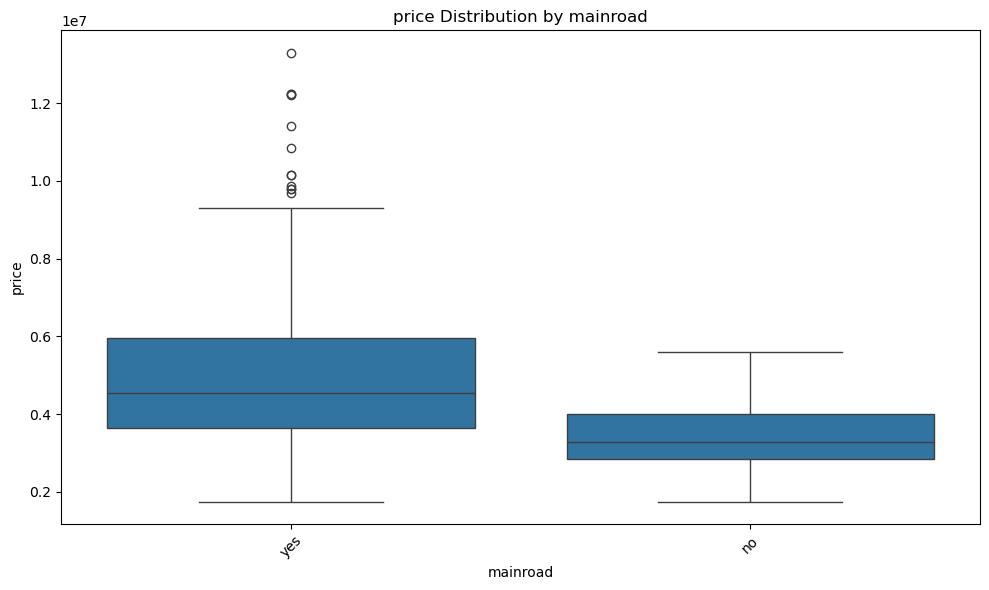

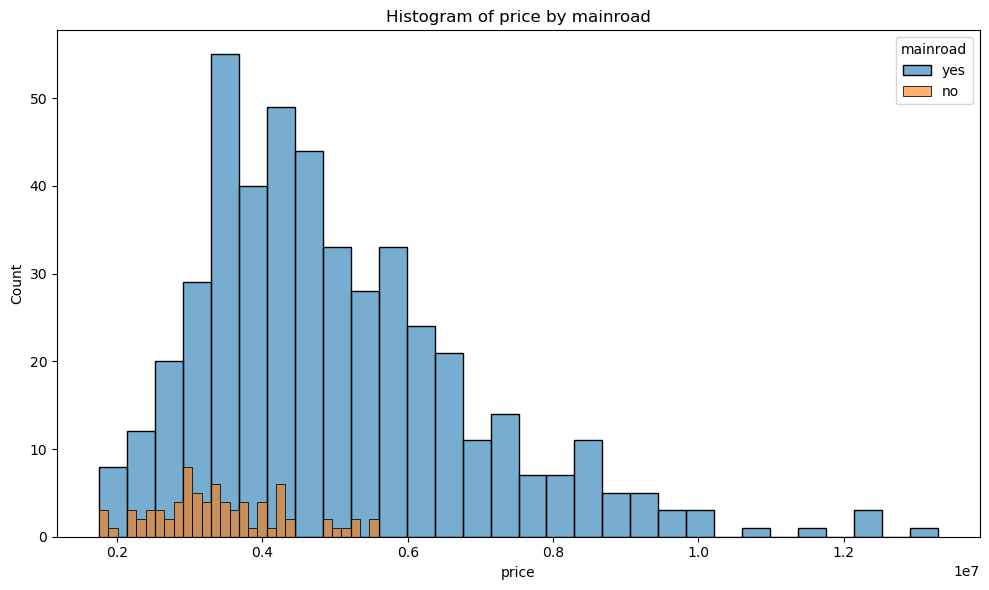

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='mainroad', y='price')
plt.title(f"{'price'} Distribution by {'mainroad'}")
plt.xlabel('mainroad')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for category in df['mainroad'].dropna().unique():
    subset = df[df['mainroad'] == category]['price']
    sns.histplot(subset, label=str(category), kde=False, bins=30, alpha=0.6)
plt.title(f"Histogram of {'price'} by {'mainroad'}")
plt.xlabel('price')
plt.ylabel("Count")
plt.legend(title='mainroad')
plt.tight_layout()
plt.show()

### Interpretation: Price vs Main Road Access
Homes with mainroad access tend to have higher prices. The boxplot shows a higher median and wider range of prices for mainroad properties, and the histogram indicates more high-priced homes in this category. This suggests that better road accessibility positively influences property value.

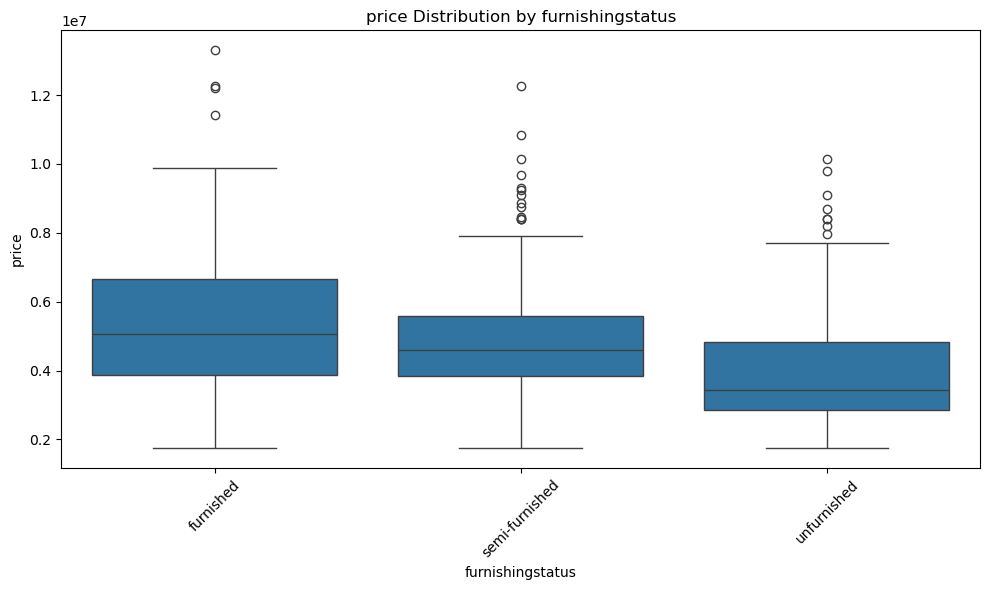

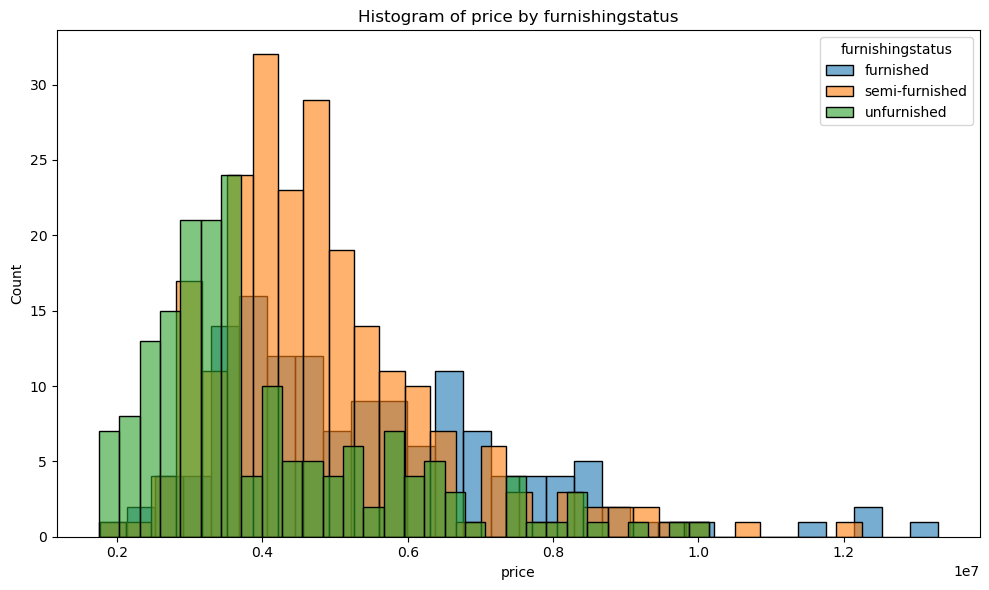

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='furnishingstatus', y='price')
plt.title(f"{'price'} Distribution by {'furnishingstatus'}")
plt.xlabel('furnishingstatus')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for category in df['furnishingstatus'].dropna().unique():
    subset = df[df['furnishingstatus'] == category]['price']
    sns.histplot(subset, label=str(category), kde=False, bins=30, alpha=0.6)
plt.title(f"Histogram of {'price'} by {'furnishingstatus'}")
plt.xlabel('price')
plt.ylabel("Count")
plt.legend(title='furnishingstatus')
plt.tight_layout()
plt.show()

### Interpretation: Price vs Furnishing Status
Furnished and semi-furnished homes tend to be more expensive than unfurnished homes. The boxplot shows higher median prices for furnished and semi-furnished properties, and the histogram confirms that these categories have more higher-priced homes. This suggests that the level of furnishing is positively associated with home price.

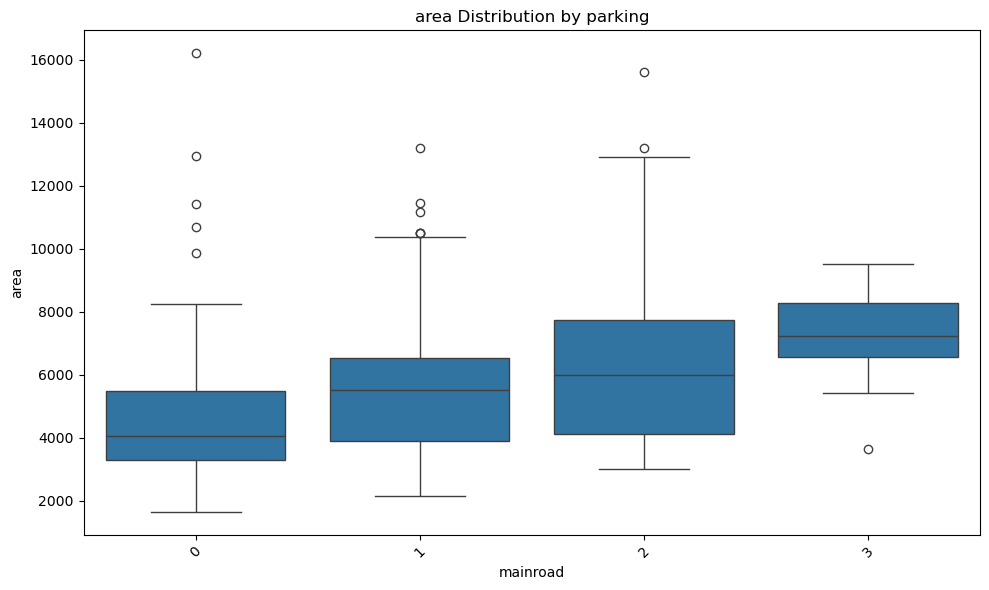

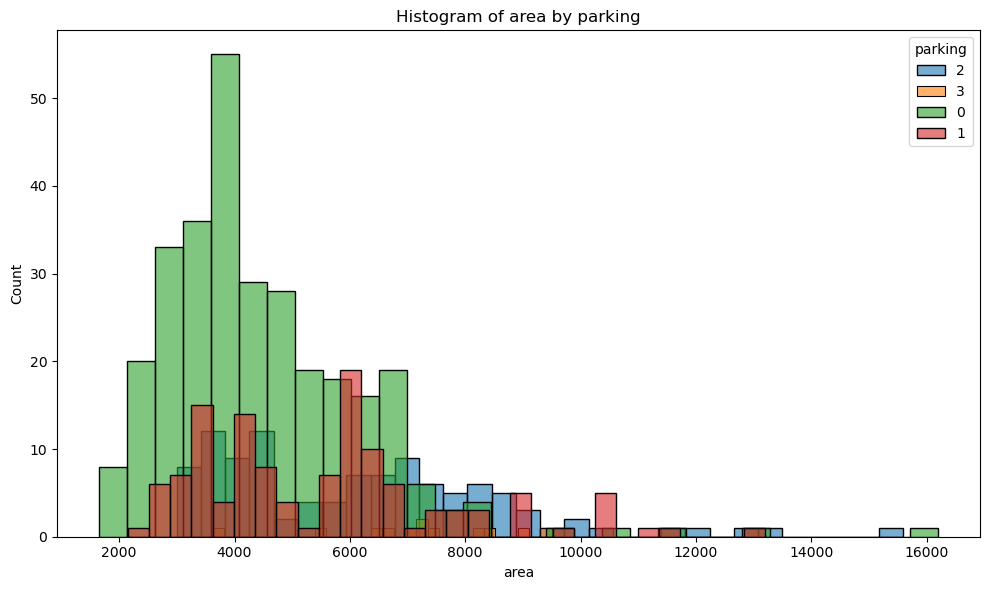

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='parking', y='area')
plt.title(f"{'area'} Distribution by {'parking'}")
plt.xlabel('mainroad')
plt.ylabel('area')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for category in df['parking'].dropna().unique():
    subset = df[df['parking'] == category]['area']
    sns.histplot(subset, label=str(category), kde=False, bins=30, alpha=0.6)
plt.title(f"Histogram of {'area'} by {'parking'}")
plt.xlabel('area')
plt.ylabel("Count")
plt.legend(title='parking')
plt.tight_layout()
plt.show()

### Interpretation: Area vs Parking Spaces
The distribution clearly shows that homes with more parking spaces tend to have larger built-up areas. Properties with zero parking are generally smaller and concentrated around lower area values, while homes with one or more parking spaces have progressively higher median areas and larger distributions. This indicates a positive association between house size and parking availability.

Contingency Table (counts):
hotwaterheating   no  yes  All
airconditioning               
no               349   24  373
yes              171    1  172
All              520   25  545

Contingency Table (% by row):
hotwaterheating     no   yes
airconditioning             
no               93.57  6.43
yes              99.42  0.58


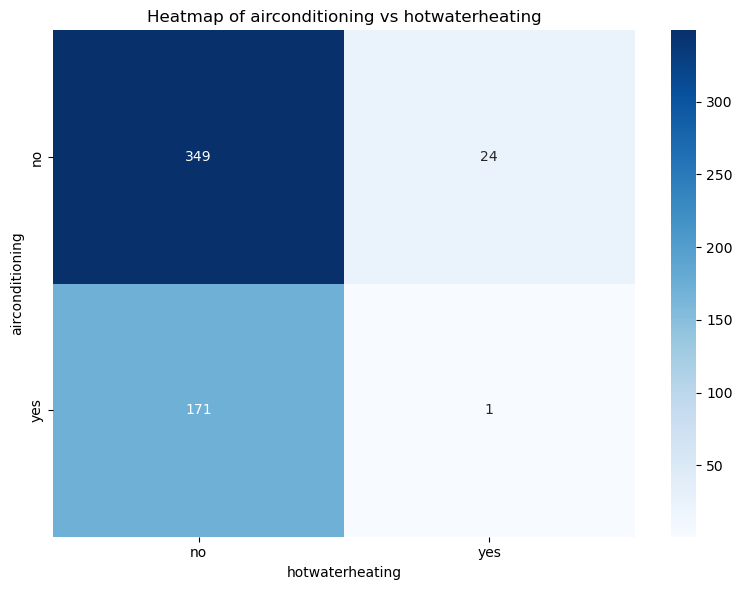

In [58]:
#Two-way frequency table
contingency = pd.crosstab(df['airconditioning'], df['hotwaterheating'], margins=True)
print("Contingency Table (counts):")
print(contingency)

contingency_pct = pd.crosstab(df['airconditioning'], df['hotwaterheating'], normalize='index') * 100
print("\nContingency Table (% by row):")
print(contingency_pct.round(2))

plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['airconditioning'], df['hotwaterheating']), annot=True, fmt="d", cmap="Blues")
plt.title(f"Heatmap of {'airconditioning'} vs {'hotwaterheating'}")
plt.xlabel('hotwaterheating')
plt.ylabel('airconditioning')
plt.tight_layout()
plt.show()

### Interpretation: Hot Water Heating vs Air Conditioning
Hot water heating is very uncommon in the dataset (only 25 homes). Among those few homes, almost all of them do not have air conditioning (24 out of 25). Air conditioning itself is much more common overall, but it is rarely paired with hot water heating.


# Summary of Key Insights

The Housing dataset displays some insightful results when analyzing the variables deeper. We can see our variables containing a mix of results that creates descriptive histograms and pie charts for their respective distributions. As there is evident fluctuations in the variables themselves, it can be seen that there are relationships between multiple variables. Many of our variables include between 2-5 results whether they're yes/no answers or number of parking spots, bedrooms, and bathrooms having ranges between 1 and 5.

Our first correlation is that 3 bedroom homes have the largest average area inside. Although there are examples of 3+ bedroom homes having larger areas, the average reaches it's maximum for 3 bedrooms. There are also boxplots to display that homes have a higher price if they are on a main road and furnished, compared to their respective counterparts. It's not the strongest correlation, but there is a relationships with parking spaces increasing with homes that have larger interior areas. Finally, we see that many homes do not include both hot water heating and air conditioning. Specifically, only 25 homes include hot water heating and there is only one home in our dataset that includes both.
